# Pymaceuticals Inc.
---

### Analysis

- Ramicane performed the best with the lowest average tumor weight and volume, the lowest variance between data points, athe lowest variablility within the dataset and is the most likely to be representative of occurances in the population among the regimens that were tested.
- Among the Capomulin, Ramicane, Infubinol, and Ceftamin regimens, Ramicane had the most evenly distributed rates of tumor volume.
- There was a mild positive correlation between tumor weight and volume in the Capomulin drug regimen.
 

In [106]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [107]:
# Checking the number of mice.
mice_number = len(combined_data["Mouse ID"].unique())
mice_number

249

In [108]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_data.loc[combined_data.duplicated(), :]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
137,g989,Propriva,Female,21,26,0,45.0,0


In [109]:
# Optional: Get all the data for the duplicate mouse ID. 

In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_unique = combined_data[combined_data["Mouse ID"] != "g989"]
combined_unique.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [111]:
# Checking the number of mice in the clean DataFrame.
mice_number = len(combined_unique["Mouse ID"].unique())
mice_number

248

## Summary Statistics

In [112]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean_volume = combined_unique.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_volume_df = mean_volume.to_frame()
mean_volume_df.rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"}, inplace=True)

median_volume = combined_unique.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_volume_df = median_volume.to_frame()
median_volume_df.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"}, inplace=True)

var_volume = combined_unique.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
var_volume_df = var_volume.to_frame()
var_volume_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"}, inplace=True)

sd_volume = combined_unique.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
sd_volume_df = sd_volume.to_frame()
sd_volume_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."}, inplace=True)

sde_volume = combined_unique.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
sde_volume_df = sde_volume.to_frame()
sde_volume_df.rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."}, inplace=True)

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.concat([mean_volume_df, median_volume_df, var_volume_df, sd_volume_df, sde_volume_df], axis=1)
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
regimen_agg = combined_unique.groupby(["Drug Regimen"]).aggregate(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]
regimen_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

AxesSubplot(0.125,0.11;0.775x0.77)


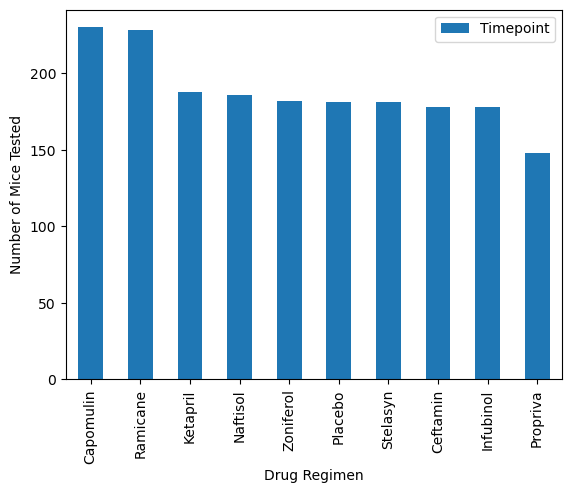

In [114]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_time = combined_unique.groupby(["Drug Regimen"])["Timepoint"].count()
total_time_df = total_time.to_frame()
total_time_df_sort = total_time_df.sort_values("Timepoint", ascending=False)
total_time_df_sort
time_plot = total_time_df_sort.plot(kind='bar', ylabel='Number of Mice Tested')
print(time_plot)

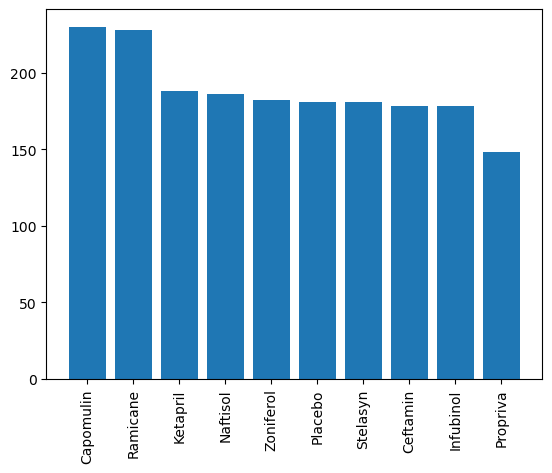

In [115]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
total_time_index_df = total_time_df_sort.reset_index()
x_axis = np.arange(len(total_time_index_df))
tick_locations = [value for value in x_axis]
plt.bar(x_axis, total_time_index_df["Timepoint"], align="center")
plt.xticks(tick_locations, total_time_index_df["Drug Regimen"], rotation="vertical")
plt.show()

AxesSubplot(0.22375,0.11;0.5775x0.77)


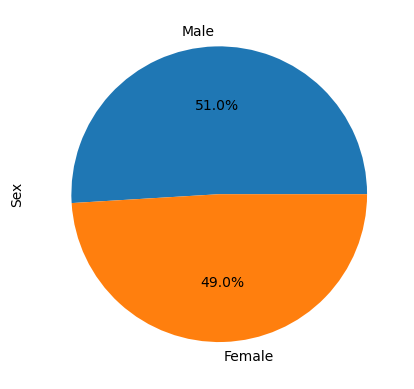

In [116]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender = combined_unique['Sex'].value_counts()
gender_plot = gender.plot(kind='pie', subplots=False, autopct='%1.1f%%')
print(gender_plot)

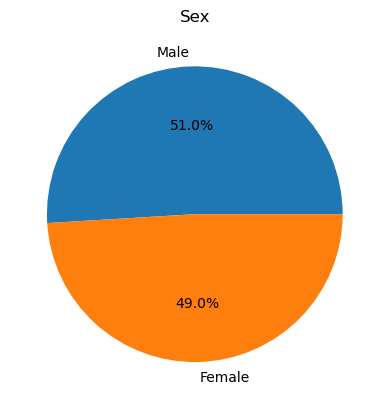

In [117]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = combined_unique["Sex"].value_counts()
gender_df = gender.to_frame()
gender_index = gender_df.reset_index()
plt.pie(gender_index["Sex"], labels=gender_index["index"], autopct="%1.1f%%")
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max = combined_unique.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
mouse_merged = pd.merge(mouse_max, combined_unique, how="left", on=["Mouse ID", "Timepoint"])
mouse_regimen = mouse_merged[(mouse_merged["Drug Regimen"] == "Capomulin") | 
                                    (mouse_merged["Drug Regimen"] == "Ramicane") |
                                    (mouse_merged["Drug Regimen"] == "Infubinol") | 
                                    (mouse_merged["Drug Regimen"] == "Ceftamin")]
mouse_regimen_vol = mouse_regimen.loc[:, ["Drug Regimen","Tumor Volume (mm3)"]]
mouse_regimen_vol

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
3,Ceftamin,62.999356
6,Ramicane,38.407618
7,Ramicane,43.047543
...,...,...
238,Ceftamin,68.594745
239,Capomulin,31.896238
240,Ceftamin,64.729837
244,Ramicane,30.638696


In [119]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
mouse_regimen_lowerq = mouse_regimen_vol.groupby("Drug Regimen").quantile(0.25)
mouse_regimen_upperq = mouse_regimen_vol.groupby("Drug Regimen").quantile(0.75)
mouse_regimen_merged = pd.merge(mouse_regimen_lowerq, mouse_regimen_upperq, how="inner", on=["Drug Regimen"])
mouse_regimen_merged["IQR"] = mouse_regimen_merged["Tumor Volume (mm3)_y"]-mouse_regimen_merged["Tumor Volume (mm3)_x"]
mouse_regimen_merged["Lower Bound"] = mouse_regimen_merged["Tumor Volume (mm3)_x"]-(1.5*mouse_regimen_merged["IQR"])
mouse_regimen_merged["Upper Bound"] = mouse_regimen_merged["Tumor Volume (mm3)_y"]-(1.5*mouse_regimen_merged["IQR"])
mouse_regimen_merged

,Tumor Volume (mm3)_x,Tumor Volume (mm3)_y,IQR,Lower Bound,Upper Bound
Drug Regimen,,,,,
Capomulin,32.377357,40.159220,7.781863,20.704562,28.486425
Ceftamin,48.722078,64.299830,15.577752,25.355450,40.933202
Infubinol,54.048608,65.525743,11.477135,36.832905,48.310040
Ramicane,31.560470,40.659006,9.098537,17.912664,27.011201


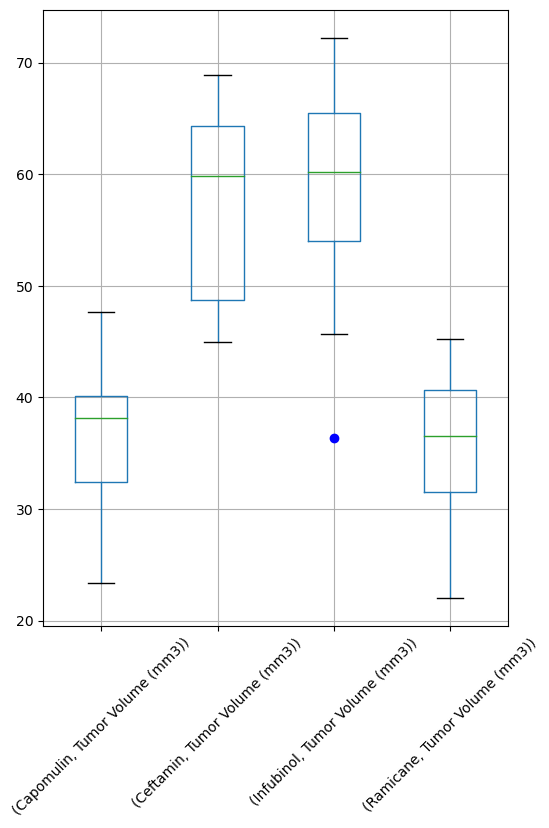

In [120]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
mouse_box_grouped = mouse_regimen_vol.groupby("Drug Regimen")
ax = mouse_box_grouped.boxplot(rot=45, fontsize=10, figsize=(6,8), subplots=False, sym='b')

## Line and Scatter Plots

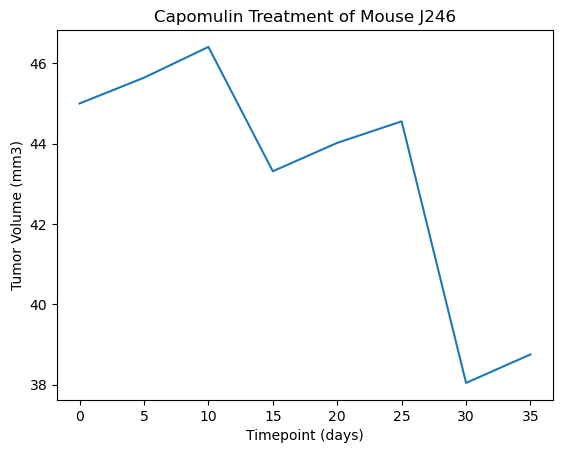

In [121]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_j246 = combined_unique[(combined_unique["Drug Regimen"] == "Capomulin") & (combined_unique["Mouse ID"] == "j246")].loc[:, ["Timepoint","Tumor Volume (mm3)"]]
plt.plot(mouse_j246["Timepoint"], mouse_j246["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse J246")
plt.show()

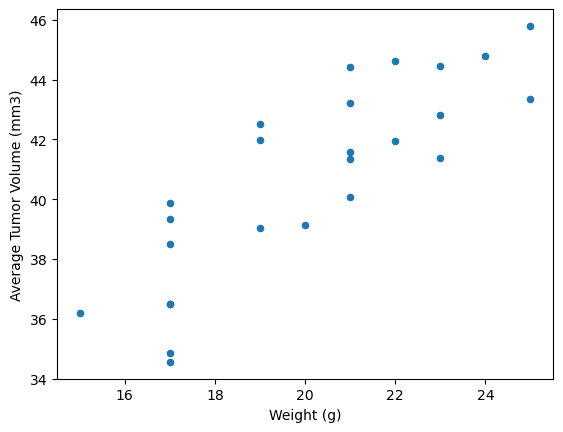

In [122]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_capomulin = combined_unique[(combined_unique["Drug Regimen"] == "Capomulin")].loc[:, ["Mouse ID", "Weight (g)","Tumor Volume (mm3)"]]
mouse_capomulin.groupby(["Mouse ID"]).mean().reset_index().plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)')
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

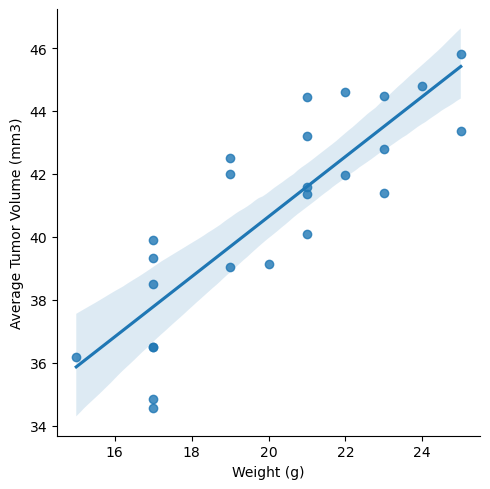

In [129]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
mouse_group = mouse_capomulin.groupby(["Mouse ID"]).mean().reset_index()
sns.lmplot(x='Weight (g)',y='Tumor Volume (mm3)', data=mouse_group)
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()